In [49]:
# Colab environment already has nltk
!pip install nltk

In [50]:
# -*- coding: utf-8 -*-
"""
TA Workshop : Text preparation step by step
"""

import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

In [51]:
#load required data for NLTK 
## Note: on local machine, you just need to run it once only using "nltk.download()"
##       at the 'NLTK Downloader' dialogue window, choose 'book', then click 'Download'

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
#with open("osha.txt") as f:
    #content = f.readlines()
with open("osha.txt") as f:
    content = f.read().splitlines()

In [53]:
listRows = []
for rows in content:
    listRows.append(rows.split('\t'))


In [54]:
listRows

[['201079928',
  ' Employee Is Burned By Forklift Radiator Fluid ',
  " At approximately 11:30 a.m. on November 13  2013  Employee #1  with Edco Waste  & Recycling Services  was operating a forklift (Linde Lift Truck; Serial  Number: H2X393S04578; identified by the employer as FL-3) from approximately  4:00 a.m.  moving bales of recyclable paper products from a collection area in  the yard into trucks. Then  Employee #1 cleaned and was replacing an air  filter on the forklift FL-3. To clean out the air filter  Employee #1 parked  FL-3 in the doorway of the maintenance building. The air filter was located on  the rear of the forklift  behind the cab frame on the driver's side. Employee  #1 removed the air filter and cleaned it out  and then he climbed up onto the  back of the forklift to replace it. While up on the back of the forklift   Employee #1's foot dislodged the cooling system radiator cap. The fluid in the  lift truck's cooling system was hot and under pressure from being opera

In [55]:
import pandas as pd
df = pd.DataFrame(listRows)
df.columns = ['Date','Title','Description']
df.head(10)

,Date,Title,Description
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...
3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...
4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...
5,202658258,Employee Suffers Burns While Moving Soup,On June 30 2013 Employee #1 was working in ...
6,202685947,Employee Injures Self With Knife,An incident occurred as Employee #1 was attem...
7,202673471,Foreman Is Fatally Crushed When Forklift Tips...,At approximately 6:30 a.m. on May 13 2013 E...
8,202369575,Employee Fractures Abdomen When Run Over By T...,On April 23 2013 Employee #1 a baggage tug...
9,202509832,Employee Suffers Abdominal Fracture In Fall F...,On April 9 2013 Employee #1 was installing ...


In [56]:
#Question 1-To find number of record and variable
df.shape

(10000, 3)

In [57]:
#Question 2-Titles one word long
df['Title_Length'] = df['Title'].apply(lambda x: len(x.split())-1)
df[df['Title_Length']==1]


,Date,Title,Description,Title_Length
62,14521470,Electric Shock,THE OWNER OF A COMPANY AND ONE OF HIS EMPLOYE...,1
192,315964536,Electric Shock,On April 3 2012 an employee was working for...,1
282,200452894,Electric Shock,At 3:30 p.m. on October 17 2011 a hotel mai...,1
284,200171080,Electric Shock,A heating ventilation and air-conditioning ...,1
285,200556546,Electric Shock,Two employees were repairing the compressor o...,1
...,...,...,...,...
9856,170616197,Electric Shock,A power line crew was dispatched on an emerge...,1
9857,982926,Electric Shock,""" A power line worker was working on a tower s...",1
9858,609099,Electric Shock,A power line worker was working on a 720-kilo...,1
9860,882647,Electric Shock,A power line worker climbed up the east side ...,1


In [58]:
df['Description']

0        At approximately 11:30 a.m. on November 13  2...
1        On August 30  2013  Employee #1 was working f...
2        On August 27  2013  Employees #1 and #2  of T...
3        On August 26  2013  Employee #1  with Lee Iro...
4        On July 14  2013  Employee #1  vacuum pump tr...
                              ...                        
9995     On June 28  2004  Employee #1 was remotely co...
9996     At approximately 9:00 p.m. on April 4  2004  ...
9997     Employee #1 was operating a remote controlled...
9998     On September 13  2002  Employee #1 was riding...
9999     At approximately 6:00 p.m. on March 9  2001  ...
Name: Description, Length: 10000, dtype: object

In [59]:
df['number_of_words'] = df.Description.apply(lambda x: len(x.split()))

In [60]:
df['number_of_tokens'] = df.Description.apply(lambda x: len(word_tokenize(x)))

In [61]:
df

,Date,Title,Description,Title_Length,number_of_words,number_of_tokens
0,201079928,Employee Is Burned By Forklift Radiator Fluid,At approximately 11:30 a.m. on November 13 2...,6,229,257
1,202561825,Employee Falls From Flatbed Trailer And Later...,On August 30 2013 Employee #1 was working f...,7,51,57
2,200361855,Two Workers Are Struck By Motor Vehicle And O...,On August 27 2013 Employees #1 and #2 of T...,10,117,133
3,200361863,Employee Is Struck By Bales Of Wire And Killed,On August 26 2013 Employee #1 with Lee Iro...,8,267,302
4,201079324,Employee Is Splashed With Hot Water And Is Bu...,On July 14 2013 Employee #1 vacuum pump tr...,8,270,295
...,...,...,...,...,...,...
9995,200994176,Employee Is Killed When Run Over By Hot Metal...,On June 28 2004 Employee #1 was remotely co...,10,172,184
9996,201144979,Employee Is Injured In Flash Fire,At approximately 9:00 p.m. on April 4 2004 ...,5,121,129
9997,171110620,Employee Killed When Struck By In,Employee #1 was operating a remote controlled...,5,59,66
9998,202313342,Employee'S Arm Is Amputated When Caught In Lo...,On September 13 2002 Employee #1 was riding...,8,137,149


In [62]:
#Question 3-Longest report has how many tokens
df['number_of_tokens'].max()

804

In [63]:
#Content of report which are 3 tokens long
df[df['number_of_tokens']==3]['Description'].unique()

array(['InspectionOpen DateSICEstablishment Name'], dtype=object)

In [64]:
df['Title']

0          Employee Is Burned By Forklift Radiator Fluid 
1        Employee Falls From Flatbed Trailer And Later...
2        Two Workers Are Struck By Motor Vehicle And O...
3         Employee Is Struck By Bales Of Wire And Killed 
4        Employee Is Splashed With Hot Water And Is Bu...
                              ...                        
9995     Employee Is Killed When Run Over By Hot Metal...
9996                   Employee Is Injured In Flash Fire 
9997                    Employee Killed When Struck By In
9998     Employee'S Arm Is Amputated When Caught In Lo...
9999           Employee Killed When Struck By Locomotive 
Name: Title, Length: 10000, dtype: object

In [65]:
#Ouestion 5-Word frequency distribution
#Converting back pandas column to text

In [154]:
df['tokens'] = df['Title'].apply(str)

In [155]:
numpy_array =df['tokens'].to_numpy()
np.savetxt("test_file.txt", numpy_array, fmt = "%s")


In [156]:
with open("test_file.txt") as f:
    content = f.read()

In [157]:
content

" Employee Is Burned By Forklift Radiator Fluid \n Employee Falls From Flatbed Trailer And Later Dies \n Two Workers Are Struck By Motor Vehicle And One Is Killed \n Employee Is Struck By Bales Of Wire And Killed \n Employee Is Splashed With Hot Water And Is Burned \n Employee Suffers Burns While Moving Soup \n Employee Injures Self With Knife \n Foreman Is Fatally Crushed When Forklift Tips Over \n Employee Fractures Abdomen When Run Over By Tug Cart \n Employee Suffers Abdominal Fracture In Fall From Ladder \n Carpenter Injured In Abdomen When Saw Kicks Back \n Employee Abdomen And Head Injury In Slip And Fall On Tarp \n Employee Sustains Ruptured Spleen After Board Kicks Back \n Employee'S Body Is Caught In Asphalt Machine  Dies \n Logger Is Injured When Butt Of Tree Kicks Out  Strikes Him \n Worker Is Injured When Struck By Board And Thrown Onto Steps \n Employee Suffers Burns When He Came In Contact With Live Wir \n Bulldozer Operator Is Crushed While Working On Engine \n Employee

In [129]:
#lowering
#df['tokens'] = df['tokens'].str.lower()

In [130]:
#tokenize
#df['tokens'] = df['tokens'].apply(lambda x: word_tokenize(x))

In [131]:
#punctuation removal


In [132]:
df['tokens']

0       [employee, is, burned, by, forklift, radiator,...
1       [employee, falls, from, flatbed, trailer, and,...
2       [two, workers, are, struck, by, motor, vehicle...
3       [employee, is, struck, by, bales, of, wire, an...
4       [employee, is, splashed, with, hot, water, and...
                              ...                        
9995    [employee, is, killed, when, run, over, by, ho...
9996             [employee, is, injured, in, flash, fire]
9997             [employee, killed, when, struck, by, in]
9998    [employee, 's, arm, is, amputated, when, caugh...
9999     [employee, killed, when, struck, by, locomotive]
Name: tokens, Length: 10000, dtype: object

In [133]:
#from nltk.corpus import stopwords

#stop = stopwords.words('english')

In [135]:
#df['tokens']=df['tokens'].apply(lambda x: [item for item in x if item not in stop])

In [140]:
#freq distribution

In [158]:
# Convert the free text into tokens
tokens = word_tokenize(content)
type(tokens)

list

In [159]:
# Now let's perform text preprocessing: 
# remove punctuations
tokens_nop = [ t for t in tokens if t not in string.punctuation ]
print("Before punctuation removal: ", tokens[:50])
print("After punctuation removal: ", tokens_nop[:50])
print("No. of tokens (before punc removal): ", len(tokens))
print("No. of tokens (after punc removal): ", len(tokens_nop))
print("No. of unique tokens after punc removal: ", len(set(tokens_nop)))

Before punctuation removal:  ['Employee', 'Is', 'Burned', 'By', 'Forklift', 'Radiator', 'Fluid', 'Employee', 'Falls', 'From', 'Flatbed', 'Trailer', 'And', 'Later', 'Dies', 'Two', 'Workers', 'Are', 'Struck', 'By', 'Motor', 'Vehicle', 'And', 'One', 'Is', 'Killed', 'Employee', 'Is', 'Struck', 'By', 'Bales', 'Of', 'Wire', 'And', 'Killed', 'Employee', 'Is', 'Splashed', 'With', 'Hot', 'Water', 'And', 'Is', 'Burned', 'Employee', 'Suffers', 'Burns', 'While', 'Moving', 'Soup']
After punctuation removal:  ['Employee', 'Is', 'Burned', 'By', 'Forklift', 'Radiator', 'Fluid', 'Employee', 'Falls', 'From', 'Flatbed', 'Trailer', 'And', 'Later', 'Dies', 'Two', 'Workers', 'Are', 'Struck', 'By', 'Motor', 'Vehicle', 'And', 'One', 'Is', 'Killed', 'Employee', 'Is', 'Struck', 'By', 'Bales', 'Of', 'Wire', 'And', 'Killed', 'Employee', 'Is', 'Splashed', 'With', 'Hot', 'Water', 'And', 'Is', 'Burned', 'Employee', 'Suffers', 'Burns', 'While', 'Moving', 'Soup']
No. of tokens (before punc removal):  72322
No. of toke

In [160]:
# Convert all characters to lower case
tokens_lower=[ t.lower() for t in tokens_nop ]
print(tokens_lower[:50])
len(set(tokens_lower))

['employee', 'is', 'burned', 'by', 'forklift', 'radiator', 'fluid', 'employee', 'falls', 'from', 'flatbed', 'trailer', 'and', 'later', 'dies', 'two', 'workers', 'are', 'struck', 'by', 'motor', 'vehicle', 'and', 'one', 'is', 'killed', 'employee', 'is', 'struck', 'by', 'bales', 'of', 'wire', 'and', 'killed', 'employee', 'is', 'splashed', 'with', 'hot', 'water', 'and', 'is', 'burned', 'employee', 'suffers', 'burns', 'while', 'moving', 'soup']


3764

In [161]:
# Create a stopword list from the standard list of stopwords available in nltk
stop = stopwords.words('english')
print(stop)
len(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

In [162]:
# Remove all these stopwords from the text
tokens_nostop=[ t for t in tokens_lower if t not in stop ]
print(tokens_nostop[:50])
print("No. of tokens(before stopword removal): ", len(tokens_lower))
print("No. of tokens(after stopword removal): ", len(tokens_nostop))

['employee', 'burned', 'forklift', 'radiator', 'fluid', 'employee', 'falls', 'flatbed', 'trailer', 'later', 'dies', 'two', 'workers', 'struck', 'motor', 'vehicle', 'one', 'killed', 'employee', 'struck', 'bales', 'wire', 'killed', 'employee', 'splashed', 'hot', 'water', 'burned', 'employee', 'suffers', 'burns', 'moving', 'soup', 'employee', 'injures', 'self', 'knife', 'foreman', 'fatally', 'crushed', 'forklift', 'tips', 'employee', 'fractures', 'abdomen', 'run', 'tug', 'cart', 'employee', 'suffers']
No. of tokens(before stopword removal):  72210
No. of tokens(after stopword removal):  52807


In [166]:
# The snowball stemmer -  which supports 13 non-English languages as well!

snowball = nltk.SnowballStemmer('english')
tokens_snow = [ snowball.stem(t) for t in tokens_nostop ]
for t0, t1 in zip(tokens_nostop[:20], tokens_snow[:20]):
    print("{:15s}{:15s}".format(t0, t1))

employee       employe        
burned         burn           
forklift       forklift       
radiator       radiat         
fluid          fluid          
employee       employe        
falls          fall           
flatbed        flatb          
trailer        trailer        
later          later          
dies           die            
two            two            
workers        worker         
struck         struck         
motor          motor          
vehicle        vehicl         
one            one            
killed         kill           
employee       employe        
struck         struck         


In [167]:
# Let's use Snowball Stemmer's result for now.
fd_snow = nltk.FreqDist(tokens_snow)
fd_snow.most_common(20)

[('employe', 7835),
 ('kill', 2139),
 ('fall', 2114),
 ('injur', 1724),
 ('struck', 1151),
 ('die', 1093),
 ('burn', 982),
 ("'s", 963),
 ('amput', 843),
 ('worker', 829),
 ('finger', 810),
 ('fractur', 790),
 ('crush', 561),
 ('electr', 553),
 ('shock', 520),
 ('caught', 475),
 ('suffer', 456),
 ('machin', 406),
 ('truck', 386),
 ('two', 340)]

[('employe', 7835), ('kill', 2139), ('fall', 2114), ('injur', 1724), ('struck', 1151)]


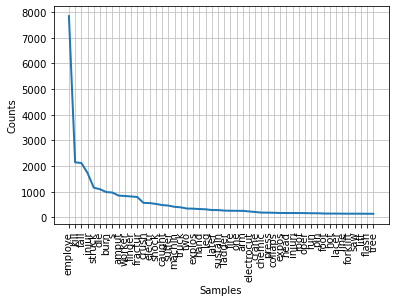

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [168]:
fd = nltk.FreqDist(tokens_snow)
print(fd.most_common(5))
fd.plot(50)